#EDA on S&P 500 Stock Prices Data

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')  


In [ ]:
import pandas as pd
import numpy as np
from termcolor import colored
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose


**Introduction- **  <br>
Historical stock market data for current S&P 500 companies, from 2014-2017. Each record represents a single day of trading, and includes the ticker name, volume, high, low, open and close prices.
<br>
<br>
**Business Problem-** <br>
Prediction of stock price index movement is regarded as a challenging task of financial time series prediction. An accurate prediction of stock price movement may yield profits for investors. Due to the complexity of stock market data, development of efficient models for predicting is very difficult.
We are trying to predict the stock prices for next few days. This will help the investors or traders forecast the movement of the market. This will become base to know right time to invest or exit the positions and yield profit.
<br>
<br>
**ML formulation of the business problem-**<br>
This will be regression problem as we are prediction the prices i.e. integer values. 
Stock price data are time sensitive. That is, the stock price at the current time point is closely related to that at short-time points rather than overdue time points. The data is a series data, we will split the data into train and test. For each stock there are 1007 values that means roughly the test data will be of 200 points i.e. we will be predicting the price for 200 days. 
<br>
<br>
**Business constraints-**<br>
1.	The cost of a mis-classification can be very high.
2.	No strict latency concerns, as we are predicting the prices for nest few days and for next few minutes
<br>
<br>
**Dataset analysis-**<br>
Data Set named (Historical stock market data for current S&P 500 companies, from 2014-2017) on kaggle. The data set contains data from 2014 to 2017 of S & P 500. The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of the index. There are 505 unique values i.e. 505 total stocks that are listed on United States stock market.
<br>
<br>
**Performance Metric-**<br>
1.	RMSE<br>
It tells you how concentrated the data is around the line of best fit.<br>
It provides information about the short-term performance of a model by allowing a term-by-term comparison of the actual difference between the estimated and the measured value.<br>
Here as the target is regression and not categorical, so we are checking how close the predicted values are close to the target values. We want less variation or differance between the two.

# Loading data from google folder

In [ ]:
stocks_data=pd.read_csv('/content/gdrive/MyDrive/Case study--1--stock machine learning approch/stock prices.csv')

In [ ]:
stocks_data

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


There are total 497472 data entries or rows and 7 columns, of which 505 has unique symbol.<br>
Will group the data by symbol column so that we will get seperate dataset or every stock symbol.<br>


In [ ]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [ ]:
stocks_data["date"]= pd.to_datetime(stocks_data["date"])

In [ ]:
total_no_of_days=stocks_data.date.max()-stocks_data.date.min()
print("Total no of days: {}".format(total_no_of_days))

Total no of days: 1457 days 00:00:00


In [ ]:
groups=stocks_data.groupby('symbol')
un=groups.first()
un

,date,open,high,low,close,volume
symbol,,,,,,
A,2014-01-02,57.1000,57.1000,56.1500,56.2100,1916160
AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
...,...,...,...,...,...,...
XYL,2014-01-02,34.3900,34.5000,33.9900,34.1600,765141
YUM,2014-01-02,75.3800,75.6100,74.8300,75.0900,1956285
ZBH,2014-01-02,92.6300,92.8200,91.9700,92.2400,868763


In [ ]:
def create_group(name):
  name_stock=groups.get_group(name)
  #ind=pd.Series([i for i in range(len(name_stock))])
  #ind

  #*********************************************************************************************
  start= name_stock.iloc[0]['close']
  last= name_stock.iloc[-1]['close']
  diff=last-start
  return name, diff, start, last




In [ ]:
def eda_1st(stocks_data):


# 1) Find min-max stock close prices from all the data set---

  start_last_diff=[]
  percentage_change=[]
  for i in stocks_data['symbol'].unique():

    start_last = create_group(i)                                                   # "create_group" function is used here.
    start_last_diff.append([start_last[0],start_last[1]])


    #************************************************************

    percent = ((start_last[3] - start_last[2])/start_last[2])*100
    percentage_change.append([start_last[0], percent])


  v=pd.DataFrame(start_last_diff, columns=['Name','Diff'])                         # DataFrame is created.
  
  print("New data set is created in which for each stock symbol we have calculated the differance between \n the very first value in the dataset ordered by date and last value in the dataset ordered by date")
  print("\n")
  print(colored("DATA FRAME NAME-- Start_last_diff", attrs=['bold']))
  print(v)
  print("*"*100,"\n")
  print("From 2014 to 2017 Stock which has gown numerically \n {} ".format(v[v['Diff']==v['Diff'].min()]))
  print("*"*100,"\n")
  print("From 2014 to 2017 Stock which has given higest or positive return \n {} ".format(v[v['Diff']==v['Diff'].max()]))
  print("*"*100,"\n")
  print("\n \n \n")


# 2) MIn and Max percentage growth of stock---

  
  for_percentage_change=pd.DataFrame(percentage_change, columns=['Name','Percentage_change'])
  print("\n")
  print(colored("DATA FRAME NAME-- Percentage_change", attrs=['bold']))
  print(for_percentage_change)
  print("*"*100,"\n")
  print("Stock which have given maximum return after investing for 4 years-- \n {}".format(for_percentage_change[for_percentage_change['Percentage_change']==for_percentage_change['Percentage_change'].max()]))
  print("Stock which have given minimum or negative return after investing for 4 years-- \n {}".format(for_percentage_change[for_percentage_change['Percentage_change']==for_percentage_change['Percentage_change'].min()]))
  print("\n \n \n")
  print("*"*100,"\n")
  return v, for_percentage_change
b=eda_1st(stocks_data)
b



New data set is created in which for each stock symbol we have calculated the differance between 
 the very first value in the dataset ordered by date and last value in the dataset ordered by date


DATA FRAME NAME-- Start_last_diff
     Name     Diff
0     AAL  26.6700
1    AAPL  90.2115
2     AAP -10.0500
3    ABBV  44.7300
4     ABC  21.9300
..    ...      ...
500   DXC  26.9500
501  BHGE -26.0400
502   BHF -11.3600
503  DWDP   4.0400
504  APTV  -3.9400

[505 rows x 2 columns]
**************************************************************************************************** 

From 2014 to 2017 Stock which has gown numerically 
     Name   Diff
100  CMG -234.4 
**************************************************************************************************** 

From 2014 to 2017 Stock which has given higest or positive return 
     Name   Diff
37  AMZN  771.5 
**************************************************************************************************** 


 
 



DATA FRAME 

(     Name     Diff
 0     AAL  26.6700
 1    AAPL  90.2115
 2     AAP -10.0500
 3    ABBV  44.7300
 4     ABC  21.9300
 ..    ...      ...
 500   DXC  26.9500
 501  BHGE -26.0400
 502   BHF -11.3600
 503  DWDP   4.0400
 504  APTV  -3.9400
 
 [505 rows x 2 columns],      Name  Percentage_change
 0     AAL         105.165615
 1    AAPL         114.165037
 2     AAP          -9.158010
 3    ABBV          86.052328
 4     ABC          31.377880
 ..    ...                ...
 500   DXC          39.661516
 501  BHGE         -45.145631
 502   BHF         -16.228571
 503  DWDP           6.013695
 504  APTV          -4.438436
 
 [505 rows x 2 columns])

# Graphs

,Name,Percentage_change
0,AAL,105.165615
1,AAPL,114.165037
2,AAP,-9.158010
3,ABBV,86.052328
4,ABC,31.377880
...,...,...
500,DXC,39.661516
501,BHGE,-45.145631
502,BHF,-16.228571
503,DWDP,6.013695


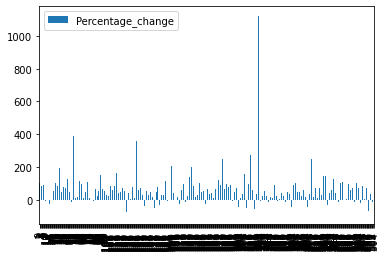

In [ ]:

hist = b[1].plot.bar()
hist
b[1]

Plot after re-sizing: 


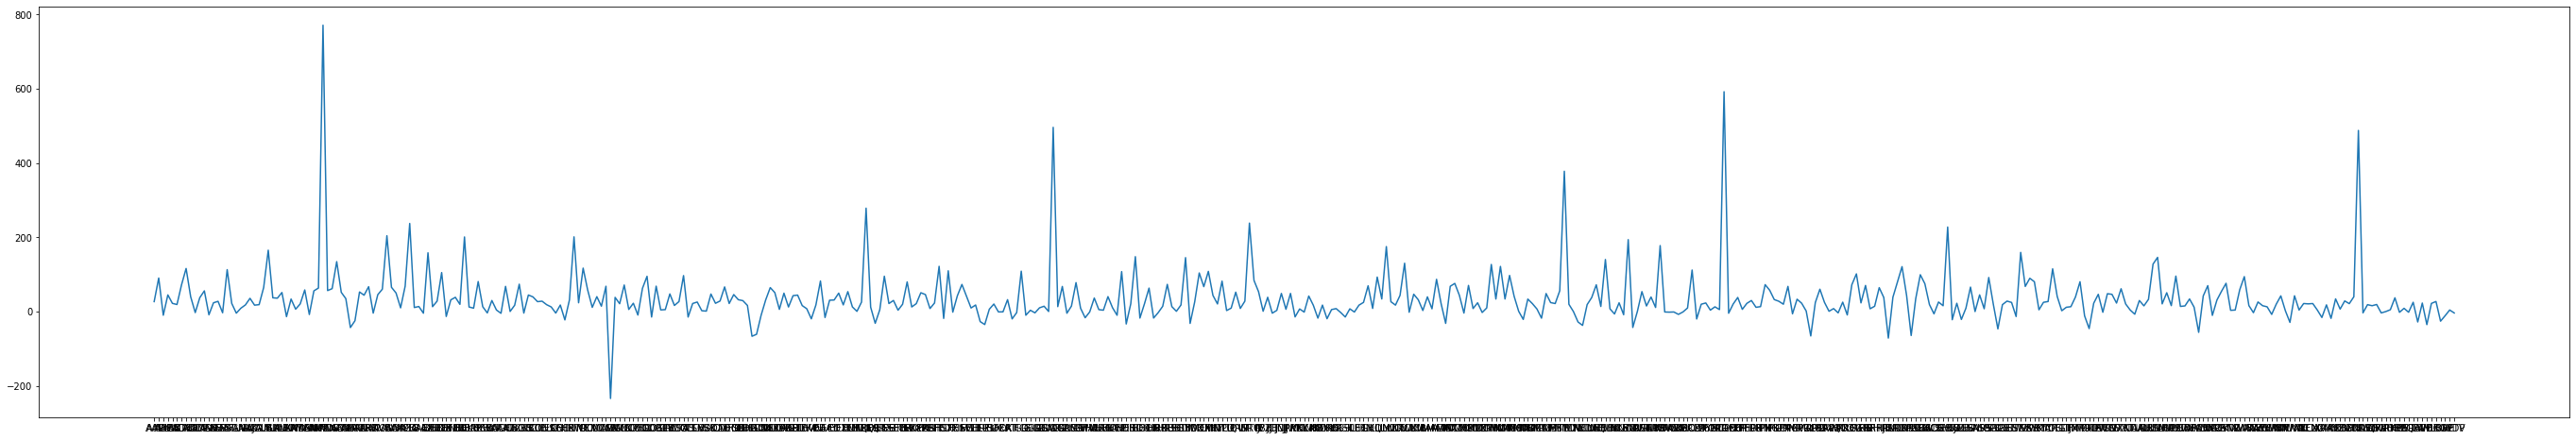

In [ ]:
#plt.xlabel('Stocks')
#plt.ylabel('Diff')

  
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(48)
f.set_figheight(8)
  
print("Plot after re-sizing: ")
plt.plot(b[0]['Name'], b[0]['Diff'])
#plt.show()

Majority of the stocks lies in between +300 and -100 

# Stocks which gave a negative return

In [ ]:
positive_return = b[1][b[1]['Percentage_change'] >= 0]
print(positive_return.shape)
negative_return = b[1][b[1]['Percentage_change'] < 0]
negative_return

(398, 2)


,Name,Percentage_change
2,AAP,-9.158010
9,ADM,-6.769016
12,ADS,-3.377297
15,AES,-24.106517
18,AGN,-2.659923
...,...,...
496,UA,-67.949952
498,EVHC,-50.565012
501,BHGE,-45.145631
502,BHF,-16.228571


*   There are total 107 stocks of 505 that gave a negative return.







Inflation rate is 2%. So stocks that gave 2% return anually can be considerd as no profit no loss stock. By compounding 2% for 4 years, roughly it become 8%. <br>
 

In [ ]:
bn=positive_return[positive_return['Percentage_change']>= 0]
print(bn.shape)
no_profit_no_loss=positive_return[(positive_return['Percentage_change'] > 1) & (positive_return['Percentage_change']< 3)]
no_profit_no_loss

(398, 2)


,Name,Percentage_change
120,CVS,2.982955
243,IVZ,1.867856




*   There are 2 stocks that are no profit and no loss.



In [ ]:
return_700=positive_return[positive_return['Percentage_change']>= 700]
return_500=positive_return[positive_return['Percentage_change']>= 500]
return_100=positive_return[positive_return['Percentage_change']>= 100]
return_75=positive_return[positive_return['Percentage_change']>= 75]
return_50=positive_return[positive_return['Percentage_change']>= 50]
return_25=positive_return[positive_return['Percentage_change']>= 25]
print("stocks that gave more than 25 % return are {}".format(return_25.shape[0]))
print("stocks that gave more than 50 % return are {}".format(return_50.shape[0]))
print("stocks that gave more than 75 % return are {}".format(return_75.shape[0]))
print("stocks that gave more than 100 % return are {}".format(return_100.shape[0]))
print("stocks that gave more than 500 % return are {}".format(return_500.shape[0]))
print("stocks that gave more than 700 % return are {}".format(return_700.shape[0]))



stocks that gave more than 25 % return are 315
stocks that gave more than 50 % return are 236
stocks that gave more than 75 % return are 149
stocks that gave more than 100 % return are 84
stocks that gave more than 500 % return are 1
stocks that gave more than 700 % return are 1


*   60% of 398 stocks gave a return of more than 50 % ie. around 239 stocks
*   90.5% of 398 stocks gave a return of more than 75% ie. around 358 stocks



Adding custom features

In [ ]:

stocks_data

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


Correlation

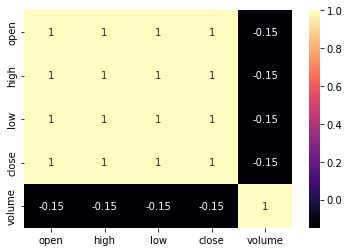

In [ ]:
import seaborn as sn
correlation=sn.heatmap(stocks_data.corr(),annot=True,cmap='magma')
correlation

Droping the 'open', 'high', and 'low' columns form the dataset as all are correlated.


In [ ]:
new_stocks_data=stocks_data.drop(['open', 'high', 'low'], axis=1)

In [ ]:
groups=new_stocks_data.groupby('symbol')

In [ ]:
#delete
AAPL_stock=groups.get_group('AAPL')
AAPL_stock

,symbol,date,close,volume
1,AAPL,2014-01-02,79.0185,58791957
484,AAPL,2014-01-03,77.2828,98303870
967,AAPL,2014-01-06,77.7042,103359151
1450,AAPL,2014-01-07,77.1481,79432766
1933,AAPL,2014-01-08,77.6371,64686685
...,...,...,...,...
494948,AAPL,2017-12-22,175.0100,16349444
495453,AAPL,2017-12-26,170.5700,33185536
495958,AAPL,2017-12-27,170.6000,21498213
496463,AAPL,2017-12-28,171.0800,16480187


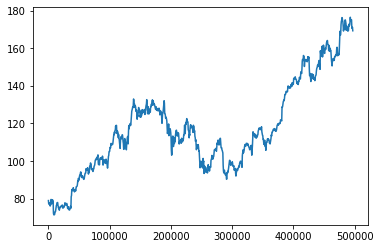

In [ ]:
AAPL_stock['close'].plot()

#Decompostion

In [ ]:
decompose_AAPL=AAPL_stock.set_index(['date'])
for_close=decompose_AAPL.drop(['symbol','volume'],axis=1)
for_volume=decompose_AAPL.drop(['symbol','close'],axis=1)


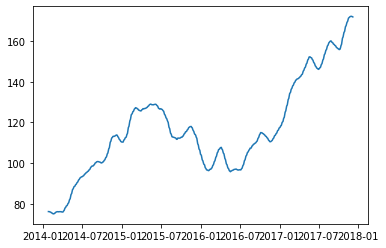

In [ ]:
result = seasonal_decompose(for_close, model='additive', freq=30)
plt.plot(result.trend)

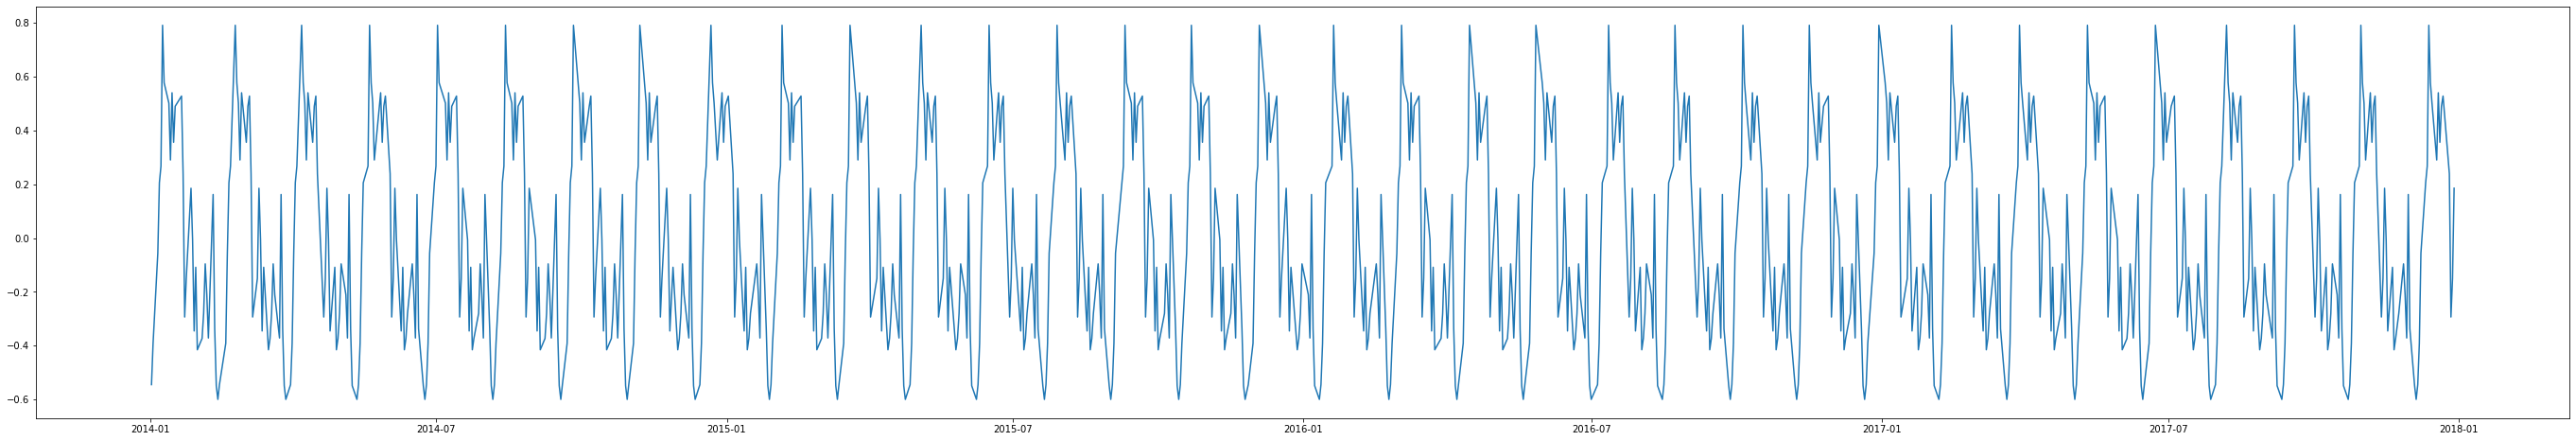

In [ ]:
f = plt.figure()
f.set_figwidth(48)
f.set_figheight(8)
plt.plot(result.seasonal)

It has a very strong seasonal pattern

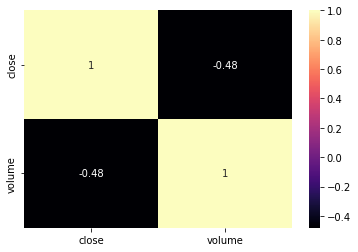

In [ ]:
correlation=sn.heatmap(AAPL_stock.corr(),annot=True,cmap='magma')
correlation

In [ ]:

# Function to create dataset.


def final_data_frame(name):
  name_stock=stocks_data.groupby('symbol').get_group('AAPL')
  scale= StandardScaler()

  v=name_stock[:-1]
  closes=[]
  volumes=[]
  dates=[]
  y=[]
  for i, j in enumerate(v.iterrows()):
    if i > 9 and i<len(v):
      
      closes.append(np.array(v['close'].iloc[i-10:i])) 
      volumes.append(np.array(v['volume'].iloc[i-2:i]))
      #dates.append(np.array(v['date'].iloc[i]))
      y.append(np.array(v['close'].iloc[i]))
  a=pd.DataFrame(closes, columns=("c-10","c-9","c-8","c-7","c-6","c-5","c-4","c-3","c-2","c-1"))
  b=pd.DataFrame(volumes, columns=("v-2","v-1"))
  #c=pd.DataFrame(dates,columns=('date'))
  new=v[10:]
  #new['c-10']=np.array(a['a'])
  #v['c-9']=a['2']
  #v
  a["v-2"]=b['v-2']
  a["v-1"]=b['v-1']
  #a["date"]=pd.to_datetime(a["date"])
  scaled_data = pd.DataFrame(scale.fit_transform(a),columns=("c-10","c-9","c-8","c-7","c-6","c-5","c-4","c-3","c-2","c-1","v-2","v-1"))
  y=pd.DataFrame(y)
  return scaled_data, y

This function creates dataset.<br>The dataset constants past 10 days closing price, past 2 days closing price and current days value is added to the train table. <br>
The train table which is obtained is standardized table.<br>
The function returns X and Y dataset

In [ ]:

for_AAPL=final_data_frame("AAPL")
for_AAPL[0]

,c-10,c-9,c-8,c-7,c-6,c-5,c-4,c-3,c-2,c-1,v-2,v-1
0,-1.553632,-1.627545,-1.611503,-1.635805,-1.617013,-1.659599,-1.682287,-1.667438,-1.606731,-1.544123,1.566886,2.166628
1,-1.626120,-1.609973,-1.634656,-1.615483,-1.658158,-1.680781,-1.665799,-1.604539,-1.542068,-1.562434,2.162402,0.508622
2,-1.608521,-1.633162,-1.614297,-1.656693,-1.679374,-1.664268,-1.602808,-1.539807,-1.560400,-1.642388,0.505698,2.569149
3,-1.631745,-1.612771,-1.655581,-1.677942,-1.662835,-1.601179,-1.537980,-1.558159,-1.640445,-1.592932,2.564607,1.510843
4,-1.611323,-1.654120,-1.676869,-1.661377,-1.599648,-1.536252,-1.556358,-1.638289,-1.590933,-1.578565,1.507133,2.035072
...,...,...,...,...,...,...,...,...,...,...,...,...
991,2.217630,2.212436,2.342336,2.293650,2.309655,2.299964,2.364739,2.458339,2.374264,2.359873,-0.707895,-0.866091
992,2.219718,2.350044,2.301950,2.317338,2.307581,2.372465,2.466084,2.380687,2.366424,2.387073,-0.867936,-0.968227
993,2.357536,2.309595,2.325682,2.315260,2.380194,2.473966,2.388317,2.372839,2.393656,2.387073,-0.969991,-1.154259
994,2.317026,2.333364,2.323600,2.387988,2.481854,2.396079,2.380457,2.400100,2.393656,2.204087,-1.155878,-0.473443


In [ ]:
for_AAPL[0]

,c-10,c-9,c-8,c-7,c-6,c-5,c-4,c-3,c-2,c-1,v-2,v-1
0,-1.553632,-1.627545,-1.611503,-1.635805,-1.617013,-1.659599,-1.682287,-1.667438,-1.606731,-1.544123,1.566886,2.166628
1,-1.626120,-1.609973,-1.634656,-1.615483,-1.658158,-1.680781,-1.665799,-1.604539,-1.542068,-1.562434,2.162402,0.508622
2,-1.608521,-1.633162,-1.614297,-1.656693,-1.679374,-1.664268,-1.602808,-1.539807,-1.560400,-1.642388,0.505698,2.569149
3,-1.631745,-1.612771,-1.655581,-1.677942,-1.662835,-1.601179,-1.537980,-1.558159,-1.640445,-1.592932,2.564607,1.510843
4,-1.611323,-1.654120,-1.676869,-1.661377,-1.599648,-1.536252,-1.556358,-1.638289,-1.590933,-1.578565,1.507133,2.035072
...,...,...,...,...,...,...,...,...,...,...,...,...
991,2.217630,2.212436,2.342336,2.293650,2.309655,2.299964,2.364739,2.458339,2.374264,2.359873,-0.707895,-0.866091
992,2.219718,2.350044,2.301950,2.317338,2.307581,2.372465,2.466084,2.380687,2.366424,2.387073,-0.867936,-0.968227
993,2.357536,2.309595,2.325682,2.315260,2.380194,2.473966,2.388317,2.372839,2.393656,2.387073,-0.969991,-1.154259
994,2.317026,2.333364,2.323600,2.387988,2.481854,2.396079,2.380457,2.400100,2.393656,2.204087,-1.155878,-0.473443


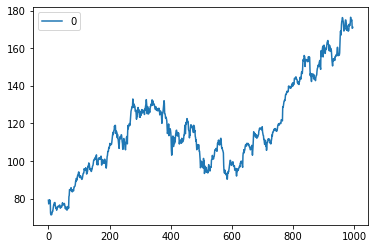

In [ ]:
for_AAPL[1].plot()

We can see in the plot that the target variable are non stationary

We are going to split the data in 80-20.<br>
So we will get 200 data points in test and remaining in train<br>
We will add synthetic data points to the training set so that we will have a ample amount of data for training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(for_AAPL[0], for_AAPL[1], test_size=0.20)
X_test.shape
y_test

,0
498,96.96
818,141.20
126,94.43
790,139.00
182,98.75
...,...
924,158.67
830,146.53
503,97.13
568,107.13


<br>
<br>

#Adding Synthetic Data points
<br>
<br>


In [ ]:
def syntheticx(X_train):
  for _ in range(3):
    arr=[]
    for i in range(len(X_train)-1):
      one=[]
      two=[]
      three=[]
      for j in range(X_train.shape[1]):
        m=X_train.iloc[i][j]
        n=X_train.iloc[i+1][j]
        b=((m+n)/2)
        if i==0:
          one.append(m)
          two.append(b)
          three.append(n)
        else:
          two.append(b)
          three.append(n)
      if i==0:
        arr.append(one)
        arr.append(two)
        arr.append(three)
      else:
        arr.append(two)
        arr.append(three)

        #new=X_train.iloc[i][c])
        #new_xtrain.iloc[i][c]=m
        #new_xtrain.iloc[i+1][c]=b
        #new_xtrain.iloc[i+2][c]=n
    X_train = pd.DataFrame(arr, columns = ['c-10',	'c-9',	'c-8',	'c-7',	'c-6',	'c-5',	'c-4',	'c-3',	'c-2',	'c-1',	'v-2',	'v-1'])
  return X_train

def syntheticy(y_train):
  for _ in range(3):
    arr=[]
    for i in range(len(y_train)-1):
      one=[]
      two=[]
      three=[]
      for j in range(y_train.shape[1]):
        m=y_train.iloc[i][j]
        n=y_train.iloc[i+1][j]
        b=((m+n)/2)
        if i==0:
          one.append(m)
          two.append(b)
          three.append(n)
        else:
          two.append(b)
          three.append(n)
      if i==0:
        arr.append(one)
        arr.append(two)
        arr.append(three)
      else:
        arr.append(two)
        arr.append(three)

        #new=X_train.iloc[i][c])
        #new_xtrain.iloc[i][c]=m
        #new_xtrain.iloc[i+1][c]=b
        #new_xtrain.iloc[i+2][c]=n
    y_train = pd.DataFrame(arr, columns = ['c'])
  return y_train


In [ ]:
X_train=syntheticx(X_train)

In [ ]:
y_train=syntheticy(y_train)
y_train

,c
0,138.68000
1,135.39500
2,132.11000
3,128.82500
4,125.54000
...,...
6356,101.41500
6357,99.89875
6358,98.38250
6359,96.86625


# *Linear Regression Model*

RMSE :  1.57399780655816


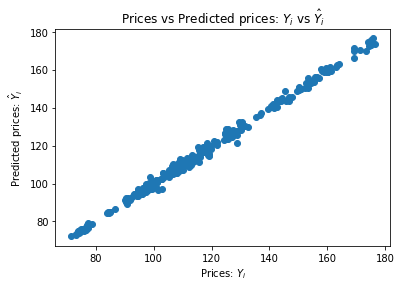

In [ ]:
#AAPL


from sklearn.metrics import mean_squared_error as MSE
X_train, X_test, y_train, y_test = train_test_split(for_AAPL[0], for_AAPL[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("RMSE : ",np.sqrt(MSE(y_test, y_pred)))
lr_rmse_aapl=np.sqrt(MSE(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
import pickle
pickle.dump(model, open('/content/gdrive/MyDrive/Case study--1--stock machine learning approch/model.pkl', 'wb'))
from joblib import dump
dump(sc_X, '/content/gdrive/MyDrive/Case study--1--stock machine learning approch/std_scaler_X.bin', compress=True)
dump(sc_y, '/content/gdrive/MyDrive/Case study--1--stock machine learning approch/std_scaler_y.bin', compress=True)

SyntaxError: ignored

In [ ]:
from joblib import load
sc=load('/content/gdrive/MyDrive/Case study--1--stock machine learning approch/std_scaler_X.bin')
X_train_std = sc.fit_transform(X_train)

In [ ]:
X_train_std

array([[ 0.10757107,  0.14933127,  0.14197446, ...,  0.20039086,
        -0.9346085 , -1.15376156],
       [-0.0319651 ,  0.00239492,  0.01970499, ...,  0.07104839,
        -0.92901467, -1.07667471],
       [-0.17150126, -0.14454142, -0.10256447, ..., -0.05829408,
        -0.92342084, -0.99958785],
       ...,
       [ 1.47960309,  1.46400496,  1.4918394 , ...,  1.42298218,
        -0.79449331, -0.83028831],
       [ 1.73963342,  1.71438297,  1.7468083 , ...,  1.68683335,
        -0.97727456, -1.05882744],
       [ 1.99966376,  1.96476099,  2.0017772 , ...,  1.95068451,
        -1.16005581, -1.28736657]])

Mean Squared Error is also low. <br>
The plot is diagonal i.e. the predicted values as almost matches with the test value

RMSE :  1.6776417412750477


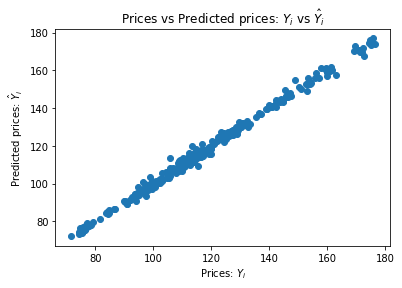

In [ ]:
# BHF

for_BHF=final_data_frame("BHF")
X_train, X_test, y_train, y_test = train_test_split(for_BHF[0], for_BHF[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("RMSE : ",np.sqrt(MSE(y_test, y_pred)))
lr_rmse_bhf=np.sqrt(MSE(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

Mean Squared Error is also low. <br>
The plot is diagonal i.e. the predicted values as almost matches with the test value

0 [-2.79091018  3.85714465 -1.97915098  1.46495704  0.80334742 -2.26333578
  3.39487993 -2.26666213  0.06440864 24.03120636 -0.08875041  0.11134519]


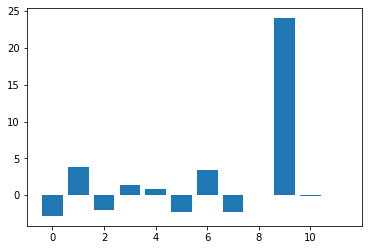

In [ ]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print(i,v)
# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.show()

The chart indicates that to predict the price, most important feature is the price of stock prior to the current day.<br>
volume of the stock does not contribute anything in predicting price.<br>
Feature 1, 5, 6, 8 has negative feature importance.

#SVR

(12,)
(5329, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


SVR for AAPL: 4.293321538895327


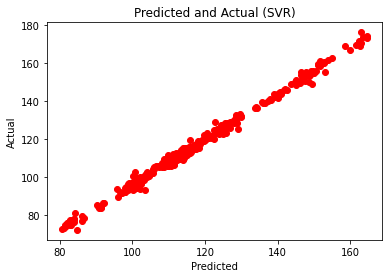

In [ ]:
#AAPL


from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(for_AAPL[0], for_AAPL[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)
print(X[0].shape)
print(y.shape)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1)) 

svr_rmse_aapl=np.sqrt(MSE(y_test, y_pred))
print("SVR for AAPL:",svr_rmse_aapl)
plt.scatter(y_pred, y_test, color = 'red')
plt.title('Predicted and Actual (SVR)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

(12,)
(5329, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR for AAPL: 4.293321538895327


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


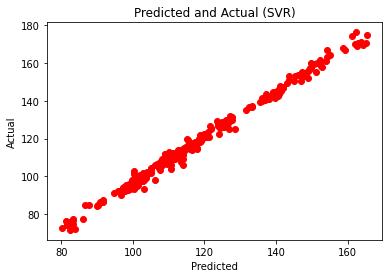

In [ ]:
#BHF


for_BHF=final_data_frame("BHF")
X_train, X_test, y_train, y_test = train_test_split(for_BHF[0], for_BHF[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)
print(X[0].shape)
print(y.shape)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1)) 

svr_rmse_bhf=np.sqrt(MSE(y_test, y_pred))
print("SVR for AAPL:",svr_rmse_aapl)
plt.scatter(y_pred, y_test, color = 'red')
plt.title('Predicted and Actual (SVR)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predicted and Acutal values are almost same, indicating that model is able to predict the test points. 


#XGBoost

RMSE :  2.414123


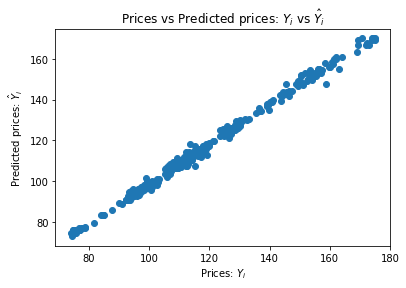

In [ ]:
#AAPL

import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(for_AAPL[0], for_AAPL[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
# Instantiation
n_estimators=[1,5,10,15,20,25,30,35,40]
esti=[]
best=[]
for i in n_estimators:

  xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                    n_estimators = i, seed = 123)
  
  # Fitting the model
  xgb_r.fit(X_train, y_train)
  
  # Predict the model
  y_pred = xgb_r.predict(X_test)
  rmse = np.sqrt(MSE(y_test, y_pred))
  esti.append(i)
  best.append(rmse)
# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
xgb_rmse_aapl=np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

RMSE :  2.410587


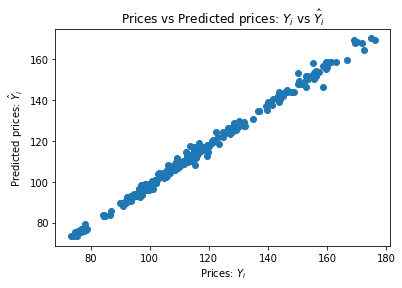

In [ ]:
#BHF


for_BHF=final_data_frame("BHF")
X_train, X_test, y_train, y_test = train_test_split(for_BHF[0], for_BHF[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
n_estimators=[1,5,10,15,20,25,30,35,40]
esti=[]
best=[]
for i in n_estimators:

  xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                    n_estimators = i, seed = 123)
  
  # Fitting the model
  xgb_r.fit(X_train, y_train)
  
  # Predict the model
  y_pred = xgb_r.predict(X_test)
  rmse = np.sqrt(MSE(y_test, y_pred))
  esti.append(i)
  best.append(rmse)
# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
xgb_rmse_bhf=np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Random Forest

In [ ]:
#AAPL

from sklearn.ensemble import RandomForestRegressor
from sklearn.calibration import CalibratedClassifierCV
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
X_train, X_test, y_train, y_test = train_test_split(for_AAPL[0], for_AAPL[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
i__=[]
j__=[]
all_rmse=[]
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestRegressor(n_estimators=i, criterion='squared_error', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train.values.ravel())
        y_pred = clf.predict(X_test)
        rmse = np.sqrt(MSE(y_test, y_pred))
        print("rmse=",rmse,"Alpha=", i,"Max_depth=", j)
        all_rmse.append(rmse)
        i__.append(i)
        j__.append(j)


for n_estimators = 100 and max depth =  5
rmse= 1.8419575891445636 Alpha= 100 Max_depth= 5
for n_estimators = 100 and max depth =  10
rmse= 1.802534186754959 Alpha= 100 Max_depth= 10
for n_estimators = 200 and max depth =  5
rmse= 1.8371142527085627 Alpha= 200 Max_depth= 5
for n_estimators = 200 and max depth =  10
rmse= 1.7990361989601769 Alpha= 200 Max_depth= 10
for n_estimators = 500 and max depth =  5
rmse= 1.8361930041522248 Alpha= 500 Max_depth= 5
for n_estimators = 500 and max depth =  10
rmse= 1.7898990551757101 Alpha= 500 Max_depth= 10
for n_estimators = 1000 and max depth =  5
rmse= 1.838048221982672 Alpha= 1000 Max_depth= 5
for n_estimators = 1000 and max depth =  10
rmse= 1.7896732577372627 Alpha= 1000 Max_depth= 10
for n_estimators = 2000 and max depth =  5
rmse= 1.8381863731269914 Alpha= 2000 Max_depth= 5
for n_estimators = 2000 and max depth =  10
rmse= 1.7890298510351328 Alpha= 2000 Max_depth= 10


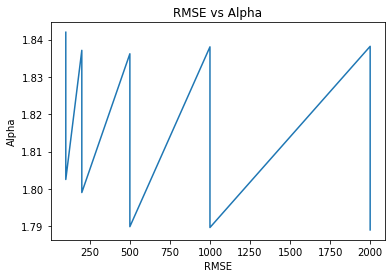

best rmse= 1.7890298510351328 
best alpha= 2000 
best depth= 10


In [ ]:
plt.plot(i__,all_rmse)
plt.xlabel("RMSE")
plt.ylabel("Alpha")
plt.title("RMSE vs Alpha")
plt.show()
b=all_rmse.index(min(all_rmse))
random_rmse_aapl=all_rmse.index(min(all_rmse))
print("best rmse=", all_rmse[b],"\nbest alpha=",i__[b],"\nbest depth=",j__[b])

In [ ]:

#BHF
X_train, X_test, y_train, y_test = train_test_split(for_BHF[0], for_BHF[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
i__=[]
j__=[]
all_rmse=[]
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestRegressor(n_estimators=i, criterion='squared_error', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train.values.ravel())
        y_pred = clf.predict(X_test)
        rmse = np.sqrt(MSE(y_test, y_pred))
        print("rmse=",rmse,"Alpha=", i,"Max_depth=", j)
        all_rmse.append(rmse)
        i__.append(i)
        j__.append(j)


for n_estimators = 100 and max depth =  5
rmse= 1.6562116836067438 Alpha= 100 Max_depth= 5
for n_estimators = 100 and max depth =  10
rmse= 1.6244078687685495 Alpha= 100 Max_depth= 10
for n_estimators = 200 and max depth =  5
rmse= 1.6503118485934491 Alpha= 200 Max_depth= 5
for n_estimators = 200 and max depth =  10
rmse= 1.6250639165526823 Alpha= 200 Max_depth= 10
for n_estimators = 500 and max depth =  5
rmse= 1.6473947287084627 Alpha= 500 Max_depth= 5
for n_estimators = 500 and max depth =  10
rmse= 1.6142933990348933 Alpha= 500 Max_depth= 10
for n_estimators = 1000 and max depth =  5
rmse= 1.6505941762163976 Alpha= 1000 Max_depth= 5
for n_estimators = 1000 and max depth =  10
rmse= 1.6138228850863912 Alpha= 1000 Max_depth= 10
for n_estimators = 2000 and max depth =  5
rmse= 1.6482545907790467 Alpha= 2000 Max_depth= 5
for n_estimators = 2000 and max depth =  10
rmse= 1.6153643279409589 Alpha= 2000 Max_depth= 10


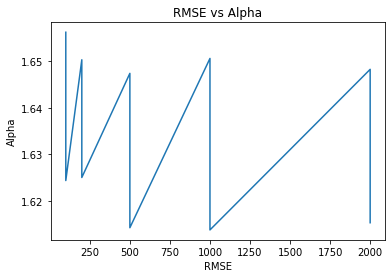

best rmse= 1.6138228850863912 
best alpha= 1000 
best depth= 10


In [ ]:
plt.plot(i__,all_rmse)
plt.xlabel("RMSE")
plt.ylabel("Alpha")
plt.title("RMSE vs Alpha")
plt.show()
b=all_rmse.index(min(all_rmse))
random_rmse_bhf=all_rmse.index(min(all_rmse))
print("best rmse=", all_rmse[b],"\nbest alpha=",i__[b],"\nbest depth=",j__[b])

#Stacking Model

In [ ]:
#AAPL


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LinearRegression()
	models['knn'] = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
	models['svr'] = SVR()
	return models
""" 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores"""
 
# define dataset
X_train, X_test, y_train, y_test = train_test_split(for_AAPL[0], for_AAPL[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	print(name, model)
	model.fit(X_train,y_train.values.ravel())
	y_pred = model.predict(X_test)
	rmse = np.sqrt(MSE(y_test, y_pred))
	results.append(rmse)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, rmse, std(rmse)))
m=results.index(min(results))
print("Best RMSE score is for ", names[m],". Score is: ",results[m])
stacking_for_aapl=names[m],results[m]

lr LinearRegression()
>lr 1.683 (0.000)
knn KNeighborsRegressor(n_neighbors=20, weights='distance')
>knn 2.827 (0.000)
svr SVR()
>svr 3.009 (0.000)
Best RMSE score is for  lr . Score is:  1.6825552956386296


In [ ]:
stacking_for_aapl[0]

'lr'

In [ ]:
#BHF


X_train, X_test, y_train, y_test = train_test_split(for_BHF[0], for_BHF[1], test_size=0.33)
X_train=syntheticx(X_train)
y_train=syntheticy(y_train)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	print(name, model)
	model.fit(X_train,y_train.values.ravel())
	y_pred = model.predict(X_test)
	rmse = np.sqrt(MSE(y_test, y_pred))
	results.append(rmse)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, rmse, std(rmse)))
m=results.index(min(results))
print("Best RMSE score is for ", names[m],". Score is: ",results[m])
stacking_for_bhf=names[m],results[m]

lr LinearRegression()
>lr 1.673 (0.000)
knn KNeighborsRegressor(n_neighbors=20, weights='distance')
>knn 2.709 (0.000)
svr SVR()
>svr 3.630 (0.000)
Best RMSE score is for  lr . Score is:  1.6727904624131573


#Tabular representation

In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["RMSE", "Score"])

# Add rows
myTable.title = 'For AAPL stock'
myTable.add_row(["Linear Regression", lr_rmse_aapl])
myTable.add_row(["SVR", svr_rmse_aapl])
myTable.add_row(["XgBoost", xgb_rmse_aapl])
myTable.add_row(["Random Forest", random_rmse_aapl])
myTable.add_row(["Stacking model", stacking_for_aapl[1]])
print()
print(myTable)



+----------------------------------------+
|             For AAPL stock             |
+-------------------+--------------------+
|        RMSE       |       Score        |
+-------------------+--------------------+
| Linear Regression | 1.7319785770837233 |
|        SVR        | 4.293321538895327  |
|      XgBoost      | 2.4141233348593247 |
|   Random Forest   |         9          |
|   Stacking model  | 1.6825552956386296 |
+-------------------+--------------------+


In [ ]:
myTable = PrettyTable(["RMSE", "Score"])

# Add rows
myTable.title = 'For BHF stock'
myTable.add_row(["Linear Regression", lr_rmse_bhf])
myTable.add_row(["SVR", svr_rmse_bhf])
myTable.add_row(["XgBoost", xgb_rmse_bhf])
myTable.add_row(["Random Forest", random_rmse_bhf])
myTable.add_row(["Stacking model", stacking_for_bhf[1]])
print()
print(myTable)


+----------------------------------------+
|             For BHF stock              |
+-------------------+--------------------+
|        RMSE       |       Score        |
+-------------------+--------------------+
| Linear Regression | 1.6776417412750477 |
|        SVR        | 4.457762837970746  |
|      XgBoost      | 2.410587300491166  |
|   Random Forest   |         7          |
|   Stacking model  | 1.6727904624131573 |
+-------------------+--------------------+


#Conclusion

*For AAPL stock Stacking model is giving lowest RMSE score.<br>
*For BHF stock Linear Regression model is giving lowest RMSE score.

In [ ]:
"""from sklearn.externals.joblib import dump, load
"""
from joblib import dump
dump(sc_X, 'std_scaler_X.bin', compress=True)
dump(sc_y, 'std_scaler_y.bin', compress=True)
pickled_model = pickle.load(open('std_scaler_y.bin', 'rb'))
pickled_model

UnpicklingError: ignored